# 1D Procedural Terrain Generation

In [1]:
import math
import random
from typing import List

import matplotlib.pyplot as plt

In [2]:
def plot(ys, point=False):
    plt.figure(figsize=(20, 3))
    plt.ylim((0, 100))
    plt.fill_between(range(len(ys)), ys, color='k')
    plt.xticks([])
    plt.yticks([])
    plt.plot(ys, 'k')
    plt.show()

In [3]:
def mapv(v, ol, oh, nl, nh):
    """maps the value `v` from old range [ol, oh] to new range [nl, nh]
    """
    return nl + (v * ((nh - nl) / (oh - ol)))

In [4]:
def linp(a, b, mu):
    """returns the intermediate point between `a` and `b` which is `mu` factor away from `a`.
    """
    return a * (1 - mu) + b * mu

In [5]:
import math

def cosp(a, b, mu):
    """returns the intermediate point between `a` and `b` which is `mu` factor away from `a`.
    """
    mu2 = (1 - math.cos(mu * math.pi)) / 2
    return a * (1 - mu2) + b * mu2

In [6]:
import random

def terrain_naive(width) -> List[float]:
    """returns the list of integers representing height at each point.
    """
    return [
        mapv(random.random(), 0, 1, 0, 100)
        for i in range(width)
    ]

In [7]:
naive_terrain = terrain_naive(2**8)

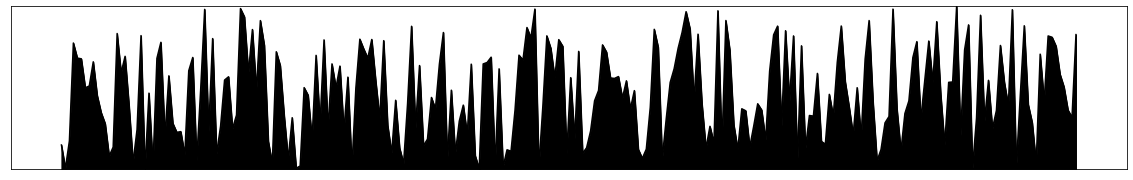

In [8]:
plot(naive_terrain)

In [9]:
def terrain_linp(naive_terrain, sample=4) -> List[float]:
    terrain = []
    sample_points = naive_terrain[::sample]
    for i in range(len(sample_points)):
        terrain.append(sample_points[i])
        for j in range(sample - 1):
            mu = (j + 1)/sample
            v = linp(sample_points[i], sample_points[(i + 1) % len(sample_points)], mu)
            terrain.append(v)
    return terrain

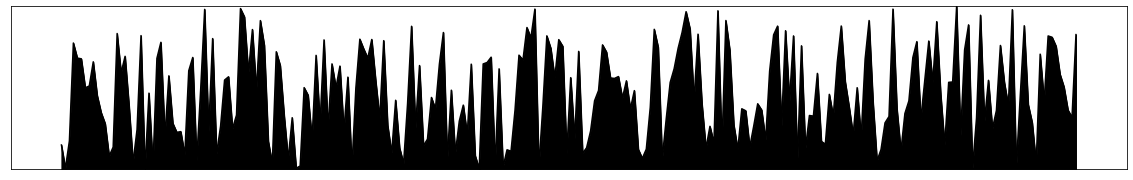

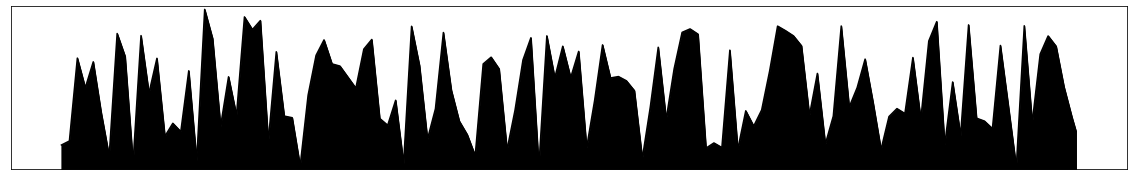

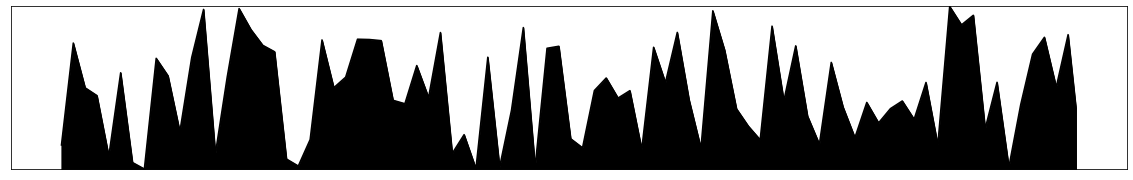

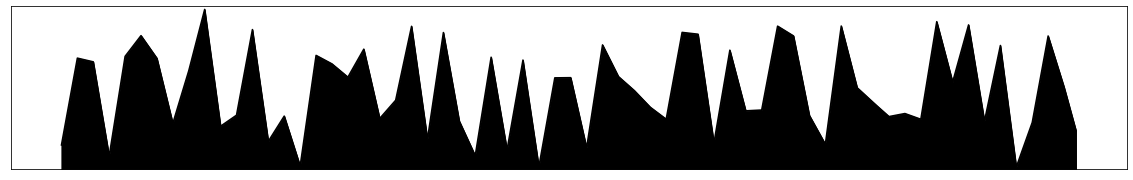

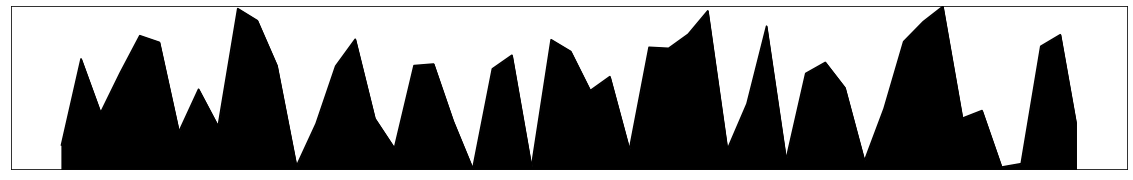

In [10]:
for sample in range(1, 6):
    plot(terrain_linp(naive_terrain, sample=sample))

In [11]:
def terrain_cosp(naive_terrain, sample=4) -> List[float]:
    terrain = []
    sample_points = naive_terrain[::sample]
    for i in range(len(sample_points)):
        terrain.append(sample_points[i])
        for j in range(sample - 1):
            mu = (j + 1)/sample
            v = cosp(sample_points[i], sample_points[(i + 1) % len(sample_points)], mu)
            terrain.append(v)
    return terrain

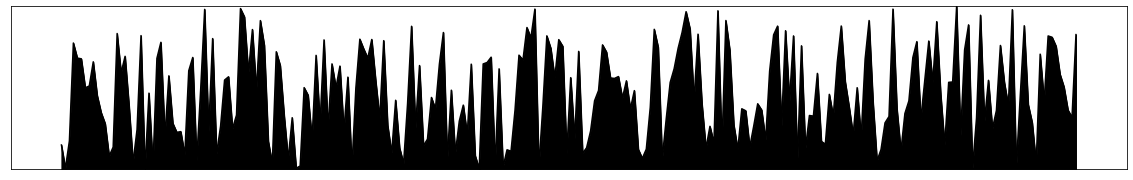

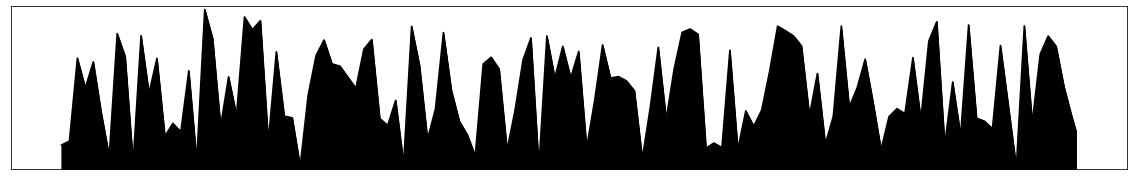

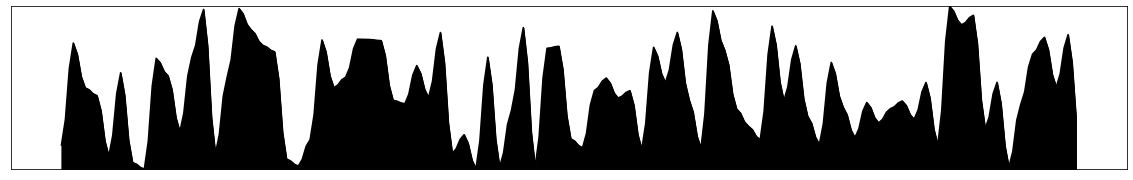

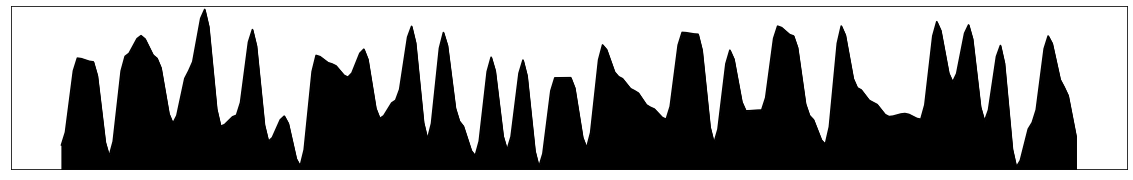

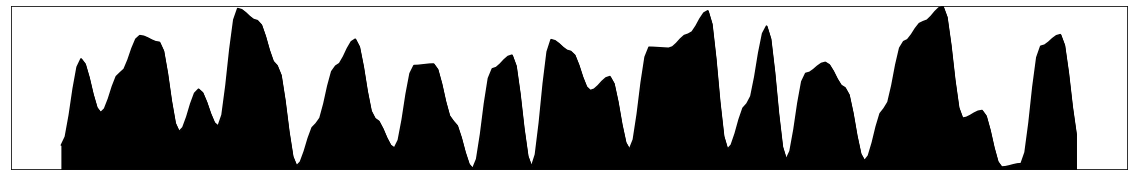

In [12]:
for sample in range(1, 6):
    plot(terrain_cosp(naive_terrain, sample=sample))

In [13]:
def terrain_superimp_linp(naive_terrain, octaves=8) -> List[float]:
    terrains = []
    scale_sum = 0
    for z in range(octaves, 0, -1):
        terrain = []
        scale = 1 / (2**(z - 1))
        sample = 1 << (octaves-z)
        sample_points = naive_terrain[::sample]
        
        scale_sum += scale

        for i in range(len(sample_points)):
            terrain.append(scale * sample_points[i])
            for j in range(sample - 1):
                mu = (j + 1)/sample
                v = linp(sample_points[i], sample_points[(i + 1) % len(sample_points)], mu)
                terrain.append(scale * v)
        
        plot(terrain)
        terrains.append(terrain)

    return [
        sum(x)/scale_sum for x in zip(*terrains)
    ]

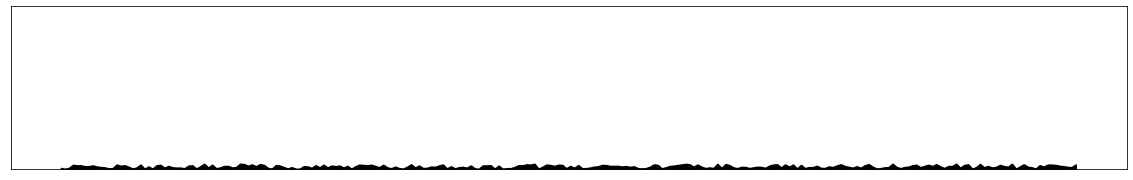

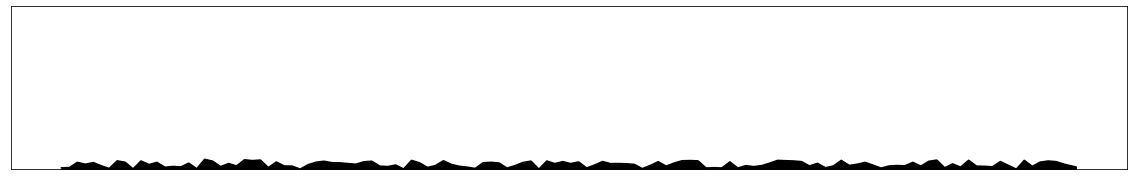

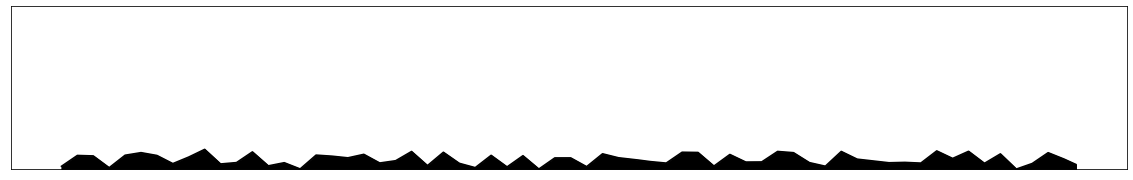

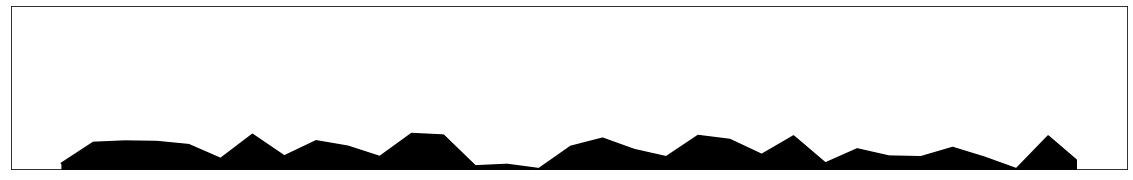

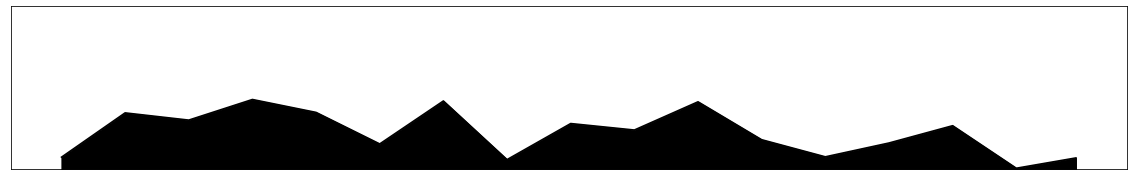

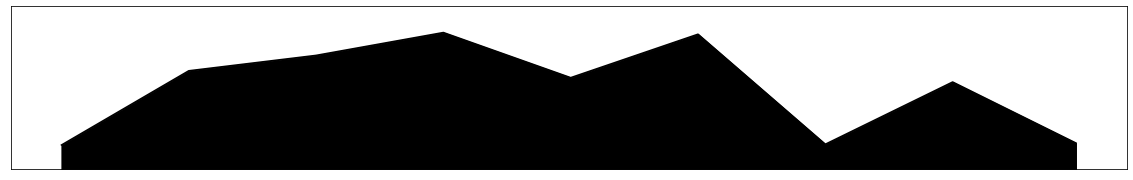

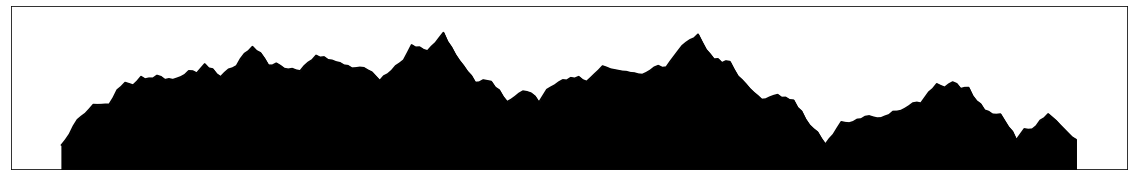

In [14]:
plot(terrain_superimp_linp(naive_terrain, octaves=6))

In [15]:
def terrain_superimp_cosp(naive_terrain, octaves=8) -> List[float]:
    terrains = []
    scale_sum = 0
    for z in range(octaves, 0, -1):
        terrain = []
        scale = 1 / (2**(z - 1))
        sample = 1 << (octaves-z)
        sample_points = naive_terrain[::sample]
        
        scale_sum += scale

        print(scale, sample, len(sample_points))
        for i in range(len(sample_points)):
            terrain.append(scale * sample_points[i])
            for j in range(sample - 1):
                mu = (j + 1)/sample
                v = cosp(sample_points[i], sample_points[(i + 1) % len(sample_points)], mu)
                terrain.append(scale * v)
        
        plot(terrain)
        terrains.append(terrain)

    return [
        sum(x)/scale_sum for x in zip(*terrains)
    ]

0.03125 1 256


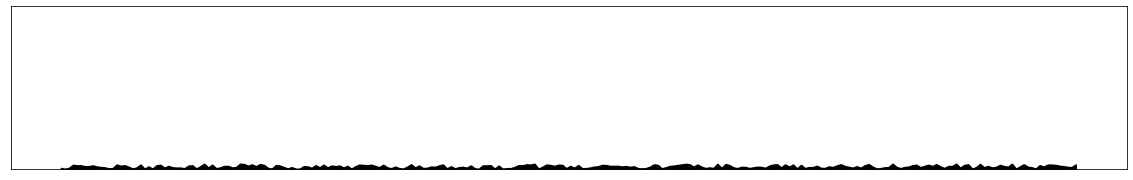

0.0625 2 128


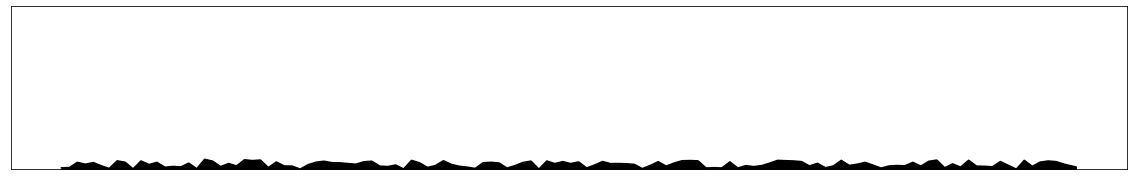

0.125 4 64


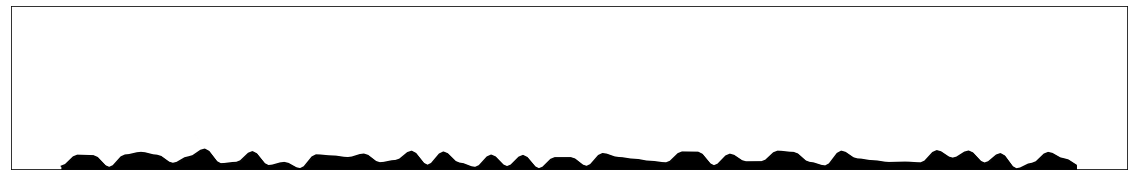

0.25 8 32


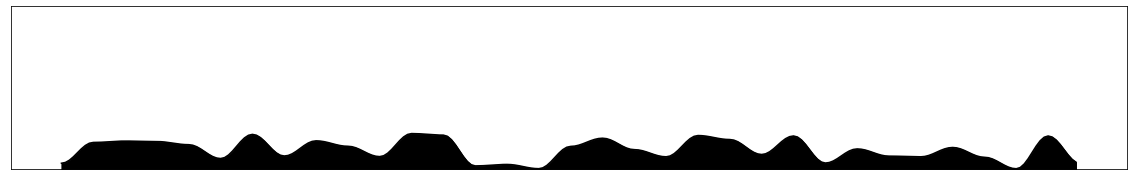

0.5 16 16


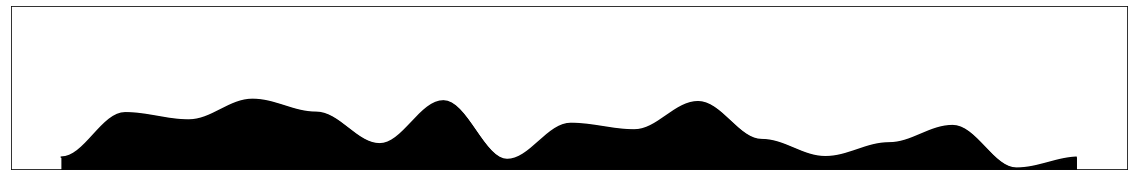

1.0 32 8


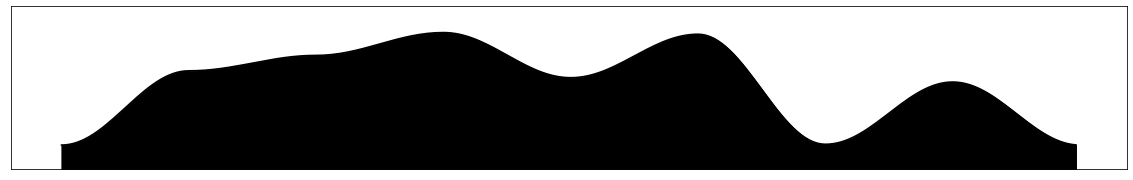

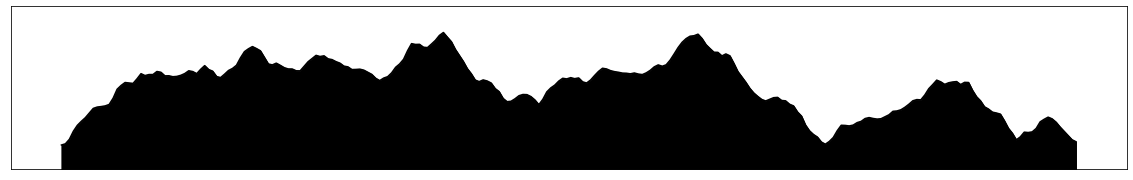

In [16]:
plot(terrain_superimp_cosp(naive_terrain, octaves=6))